# **1. OBTENÇÃO DE DADOS**

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request,sys,time
import requests
#from keras.utils import to_categorical
from tensorflow import keras
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf
import tensorflow_hub as hub
from google.colab import drive
import string
from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from sklearn.cluster import OPTICS, Birch, KMeans, SpectralClustering
from sklearn.cluster import DBSCAN, MeanShift, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

drive.mount('/content/drive')
df =pd.read_csv("drive/MyDrive/Faculdade/TCC/Tentativa 01/data1.csv")


Mounted at /content/drive


In [ ]:
df

,Unnamed: 0,Statement,Autor,Source,label
0,14643,"""Over the past 35 years, Florida families have...",Amy Sherman,Rick Scott,1
1,13893,"Says he ""forced Washington to open up the Arct...",Julie Kliegm,Mark Begich,1
2,16269,U.S. military uniforms are manufactured in China.,C. Eugene Emery Jr.,Anthony Gemma,0
3,2532,Says Republican leaders “are working hard to c...,Laura Sch,Donald Trump,0
4,18418,The deal to raise the federal debt limit creat...,Willoughby Maria,Saxby Chambliss,1
...,...,...,...,...,...
8685,14396,Says there’s no language in the U.S. Constitut...,Eric Stirgus,Allan Levene,1
8686,16080,Almost 400 arrests in the city last year for p...,Janel Davi,Michael Julian Bond,1
8687,2269,"The Trump administration worked to free 5,000 ...",Miriam Valverd,Mitt Romney,1
8688,11870,"Says Bernie Sanders chose ""to spend his honeym...",Will Cabanis,George Will,1


In [ ]:
paginas= 746
## Só vai até a 746
upperframe=[]
for page in range(1,paginas+1):
    print('Processando :', page)
    url = 'https://www.politifact.com/factchecks/list/?page='+str(page)
    print(url)

    #Talvez o código possa achar uma exceção
    try:
        #Achar as urls
        page=requests.get(url)                             # Isso irá voltar case ache a exceção

    except Exception as e:                                   # Entra na exceção propriamente dita
        error_type, error_obj, error_info = sys.exc_info()      # Pegar a informação da exceção
        print ('ERRO NO LINK:',url)                          # Printar o erro
        print (error_type, 'Linha:', error_info.tb_lineno)     #Printar o erro e oq aconteceu
        continue                                              # Saí do erro e vai para a próxima página
    time.sleep(3)
    soup=BeautifulSoup(page.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    print(len(links))
    filename="Noticias.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Titulo,Link,Date, Source, Label\n"
    f.write(headers)

    for j in links:
        Titulo = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Autor= j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[4:-21].strip()
        Data = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-18:-1].strip()
        Fonte = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Titulo,Link,Data,Fonte,Label,Autor))
        f.write(Titulo.replace(",","^")+","+Link+","+Data.replace(",","^")+","+Fonte.replace(",","^")+","+Label.replace(",","^")+"\n")
    upperframe.extend(frame)
f.close()
data=pd.DataFrame(upperframe, columns=['Titulo','Link','Data','Fonte','label','Autor'])
data.head()



Processando : 1
https://www.politifact.com/factchecks/list/?page=1
30
Processando : 2
https://www.politifact.com/factchecks/list/?page=2
30
Processando : 3
https://www.politifact.com/factchecks/list/?page=3
30
Processando : 4
https://www.politifact.com/factchecks/list/?page=4
30
Processando : 5
https://www.politifact.com/factchecks/list/?page=5
30
Processando : 6
https://www.politifact.com/factchecks/list/?page=6
30
Processando : 7
https://www.politifact.com/factchecks/list/?page=7
30
Processando : 8
https://www.politifact.com/factchecks/list/?page=8
30
Processando : 9
https://www.politifact.com/factchecks/list/?page=9
30
Processando : 10
https://www.politifact.com/factchecks/list/?page=10
30
Processando : 11
https://www.politifact.com/factchecks/list/?page=11
30
Processando : 12
https://www.politifact.com/factchecks/list/?page=12
30
Processando : 13
https://www.politifact.com/factchecks/list/?page=13
30
Processando : 14
https://www.politifact.com/factchecks/list/?page=14
30
Processand

### 2. **Preparação de dados**




---



In [ ]:
#df=data

In [ ]:
#target={'true':1, 'pants-fire':0, 'mostly-true':1}
#, 'barely-true':1}

In [ ]:
#df['target']=df['label'].map(target)

In [ ]:
#df = df[["Titulo", 'Autor', 'Fonte', "target"]]

In [ ]:
#df = df.rename(columns={'Titulo': 'Titulo', 'target': 'label'})

In [ ]:
df = df[df['label'].notna()]
df=df[df['Autor'].notna()]


In [ ]:
df = df.sample(frac=1)

In [ ]:
df

,Unnamed: 0,Statement,Autor,Source,label
7566,10315,"""The mosquito population in South Florida is l...",Joshua Gill,Josh Earnest,1
3237,18302,Says President Barack Obama delivered $2 billi...,Gregory Trotter,Rick Perry,0
4572,8827,"Says transgender residents make up ""about 1-in...",W. Gardner Sel,Ashley Smith,1
7436,13085,"""Much more than 50 percent of parents out ther...",Jon Greenberg,Donald Trump,1
8401,19111,"Virginia was named ""best managed state, best s...",Jacob Gei,Tim Kaine,1
...,...,...,...,...,...
3239,8420,These guys are now pretty much living up to th...,Matt Dietrich,Daniel Biss,1
7323,14731,"Under the Endangered Species Act, ""only 1 perc...",Louis Jacobson,Cynthia Lummis,1
2330,20076,"""For the first time in history, Wisconsin has ...",Tom Kertscher,Leah Vukmir,1
2349,16240,"Says Charlie Crist ""was pro-life, pro-gun and ...",Amy Sherman,George LeMieux,1


In [ ]:
data=df

In [ ]:
#df.to_csv('data1.csv')

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=128):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["Titulo"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.7*len(df)), int(0.85*len(df))])

In [ ]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(128, 50), dtype=float32, numpy=
array([[ 2.13614196e-01,  3.73306274e-02,  2.00712681e-01, ...,
        -7.09232539e-02,  1.41297309e-02,  7.37918839e-02],
       [ 5.61657012e-01,  2.58068979e-01, -5.86350672e-02, ...,
        -4.04862687e-03, -1.33880213e-01,  2.63705432e-01],
       [ 2.76833951e-01,  1.18495546e-01, -9.36872512e-02, ...,
        -1.10041641e-01, -9.61400643e-02, -4.05302650e-04],
       ...,
       [ 3.37389141e-01,  1.48608387e-01,  3.53058785e-01, ...,
        -2.78933309e-02, -9.20185298e-02,  7.82046691e-02],
       [ 1.21270984e-01,  1.48137018e-01,  1.88547090e-01, ...,
        -2.17356443e-01,  2.87856497e-02,  1.12299323e-01],
       [ 3.66118222e-01,  2.38508403e-01, -1.64501071e-02, ...,
        -2.06925534e-02, -1.71665177e-02, -8.62193946e-03]], dtype=float32)>





# 3. **Modelagem da rede neural**

In [ ]:
initializer_k = tf.keras.initializers.RandomNormal(stddev=1.0, seed = None) #Inicializador dos pesos
initializer_b = tf.keras.initializers.RandomNormal(stddev=np.pi, seed = None) #Inicializador dos bias

In [ ]:
model2 = tf.keras.Sequential()
model2.add(hub_layer)
model2.add( tf.keras.layers.Dense(60, activation='relu', kernel_initializer=initializer_k, bias_initializer=initializer_b ) )
model2.add(tf.keras.layers.Dropout(0.3))
model2.add( tf.keras.layers.Dense(60, activation='relu', kernel_initializer=initializer_k, bias_initializer=initializer_b ) )
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              loss=tf.keras.losses.BinaryCrossentropy(), steps_per_execution=None,
              metrics=['accuracy'])

In [ ]:
model2.evaluate(train_data)

48/48 [==============================] - 1s 4ms/step - loss: 27.5887 - accuracy: 0.3277


[27.588674545288086, 0.32773661613464355]

In [ ]:
model2.evaluate(test_data)

11/11 [==============================] - 0s 3ms/step - loss: 26.8814 - accuracy: 0.3418


[26.881425857543945, 0.341781884431839]

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_3 (Dense)             (None, 60)                3060      
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 60)                3660      
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 48,197,381
Trainable params: 48,197,381


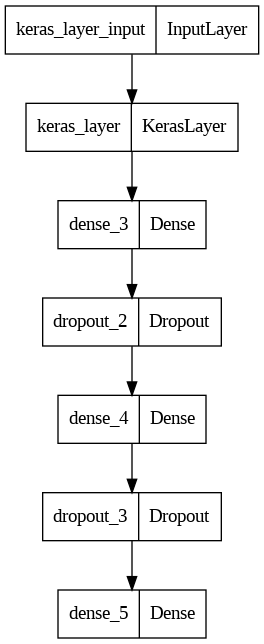

In [ ]:
keras.utils.plot_model(model2, "my_first_model.png")


In [ ]:
history = model2.fit(train_data, epochs=30, validation_data=valid_data)

Epoch 1/30
48/48 [==============================] - 24s 486ms/step - loss: 18.8028 - accuracy: 0.3440 - val_loss: 11.2093 - val_accuracy: 0.3303
Epoch 2/30
48/48 [==============================] - 24s 502ms/step - loss: 7.7881 - accuracy: 0.4407 - val_loss: 2.2882 - val_accuracy: 0.5315
Epoch 3/30
48/48 [==============================] - 23s 484ms/step - loss: 4.1293 - accuracy: 0.5669 - val_loss: 1.4115 - val_accuracy: 0.6882
Epoch 4/30
48/48 [==============================] - 23s 487ms/step - loss: 3.6396 - accuracy: 0.6030 - val_loss: 1.2920 - val_accuracy: 0.7189
Epoch 5/30
48/48 [==============================] - 23s 487ms/step - loss: 3.1570 - accuracy: 0.6341 - val_loss: 1.1826 - val_accuracy: 0.7358
Epoch 6/30
48/48 [==============================] - 24s 505ms/step - loss: 2.9423 - accuracy: 0.6402 - val_loss: 1.0852 - val_accuracy: 0.7481
Epoch 7/30
48/48 [==============================] - 24s 508ms/step - loss: 2.5254 - accuracy: 0.6640 - val_loss: 1.0052 - val_accuracy: 0.75

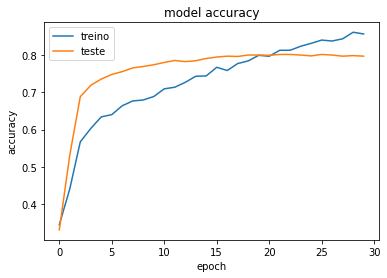

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'],loc='upper left')
plt.show()

# **3.1 Rede LSTM**


In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'in', 'of', 'to', 'a', 'and', 'says', 'for',
       'is', 'that', 'on', 'are', 'have', 'than', 'has', 'more', 'was',
       'percent'], dtype='<U17')

In [ ]:
model1 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model1.evaluate(train_data)
model1.evaluate(valid_data)

11/11 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4316


[0.6934843063354492, 0.43164363503456116]

In [ ]:
history = model1.fit(train_data, epochs=20, validation_data=valid_data)

Epoch 1/20
48/48 [==============================] - 7s 58ms/step - loss: 0.6905 - accuracy: 0.6102 - val_loss: 0.6872 - val_accuracy: 0.6697
Epoch 2/20
48/48 [==============================] - 3s 55ms/step - loss: 0.6836 - accuracy: 0.6708 - val_loss: 0.6794 - val_accuracy: 0.6697
Epoch 3/20
48/48 [==============================] - 3s 55ms/step - loss: 0.6758 - accuracy: 0.6716 - val_loss: 0.6704 - val_accuracy: 0.6697
Epoch 4/20
48/48 [==============================] - 3s 55ms/step - loss: 0.6650 - accuracy: 0.6719 - val_loss: 0.6585 - val_accuracy: 0.6697
Epoch 5/20
48/48 [==============================] - 3s 57ms/step - loss: 0.6506 - accuracy: 0.6719 - val_loss: 0.6419 - val_accuracy: 0.6697
Epoch 6/20
48/48 [==============================] - 3s 56ms/step - loss: 0.6321 - accuracy: 0.6719 - val_loss: 0.6210 - val_accuracy: 0.6697
Epoch 7/20
48/48 [==============================] - 3s 54ms/step - loss: 0.6144 - accuracy: 0.6719 - val_loss: 0.6104 - val_accuracy: 0.6697
Epoch 8/20
48

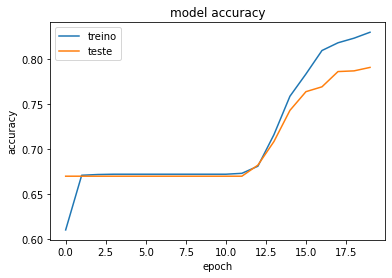

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

Deixar um espaço caso consiga utilizar o Sequential API


In [ ]:
'''def df_to_dataset1(dataframe, shuffle=True, batch_size=128):
  data = dataframe.copy()
  labels = data.pop('label')
  data = data["Statement"]
  ds1 = tf.data.Dataset.from_tensor_slices((data, labels))
  if shuffle:
    ds1 = ds1.shuffle(buffer_size=len(dataframe))
  ds1 = ds1.batch(batch_size)
  ds1 = ds1.prefetch(tf.data.AUTOTUNE)
  return ds1'''

In [ ]:
'''def df_to_dataset2(dataframe, shuffle=True, batch_size=128):
  data = dataframe.copy()
  labels = data.pop('label')
  data = data["Source"]
  ds2 = tf.data.Dataset.from_tensor_slices((data, labels))
  if shuffle:
    ds2 = ds2.shuffle(buffer_size=len(dataframe))
  ds2 = ds2.batch(batch_size)
  ds2 = ds2.prefetch(tf.data.AUTOTUNE)
  return ds2'''

In [ ]:
'''def df_to_dataset3(dataframe, shuffle=True, batch_size=128):
  data = dataframe.copy()
  labels = data.pop('label')
  data = data["Autor"]
  ds3 = tf.data.Dataset.from_tensor_slices((data, labels))
  if shuffle:
    ds3 = ds3.shuffle(buffer_size=len(dataframe))
  ds3 = ds3.batch(batch_size)
  ds3 = ds3.prefetch(tf.data.AUTOTUNE)
  return ds3'''

# **4. MODIFICANDO OS DADOS PARA UTILIZAR ALGORITMOS CONHECIDOS**

In [ ]:
X = df["ColumnA"]
y = df['label'].values

In [ ]:
# Inicializa tokenizador regex
tokenizer = RegexpTokenizer(r"[a-zA-Z]{3,}")
# Vetoriza o documento com TF-IDF, separando em palavras
tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words='english', min_df=0.2, max_df=0.5, ngram_range=(1,1), tokenizer=tokenizer.tokenize)
# Ajusta modelo e aplica sobre conjunto de treino
X = tf_idf_vect.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.30)



# **5. USANDO KNN**

In [ ]:
accuracy_all=[]
cvs_all=[]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start= time.time()
clf= KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)
scores=cross_val_score(clf,X,y, cv=5)
end=time.time()
accuracy_all.append(accuracy_score(prediction,y_test))
cvs_all.append(np.mean(scores))
print("Precisão: {0:2,}".format(accuracy_score(prediction,y_test)))

Precisão: 0.3629032258064516


# **5.1 Naive Bayes**

In [ ]:
X1=X.toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y,
test_size = 0.20)

In [ ]:
accuracy_all=[]
cvs_all=[]

Naive bayes não funciona com Matriz esparça


In [ ]:
from sklearn.naive_bayes import GaussianNB
start= time.time()
clf= GaussianNB()
clf.fit(X1_train, y_train)
prediction=clf.predict(X1_test)
scores=cross_val_score(clf,X1,y, cv=5)
end=time.time()
accuracy_all.append(accuracy_score(prediction,y_test))
cvs_all.append(np.mean(scores))
print("Precisão: {0:2,}".format(accuracy_score(prediction,y_test)))

Precisão: 0.6676267281105991


# **5.2 Árvore de decisão**

In [ ]:
accuracy_all=[]
cvs_all=[]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
start= time.time()
clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)
scores=cross_val_score(clf,X,y, cv=5)
end=time.time()
accuracy_all.append(accuracy_score(prediction,y_test))
cvs_all.append(np.mean(scores))
print("Precisão: {0:2,}".format(accuracy_score(prediction,y_test)))

Precisão: 0.6697388632872504


# **6. Comparação gráfica dos resultados**

Text(0.5, 0.98, 'Visualização Gráfica dos resultados')

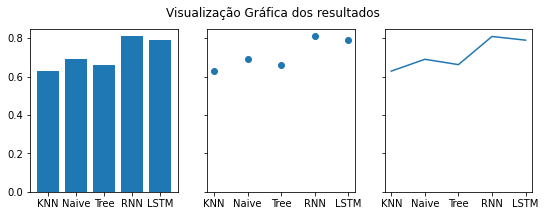

In [ ]:
data1 = {'KNN': 0.6290322580645161, 'Naive':  0.690668202764977, 'Tree': 0.662826420890937, 'RNN': 0.8095, 'LSTM':0.7903}
names = list(data1.keys())
values = list(data1.values())
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Visualização Gráfica dos resultados')



# **7. Aplicando algoritmos de clustering**


In [ ]:
n_classes=2

# **7.1 K-means**


In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 


[1 0 0 ... 0 0 0]


In [ ]:
score1 = metrics.accuracy_score(y_test,kmeans.predict(X_test))
print(score1)

0.38018433179723504


# **7.2 Agglomerative Clustering**

In [ ]:
# Define o modelo determinando o número de clusters
model = AgglomerativeClustering(n_clusters=n_classes)

# Aplica modelo, associando cada exemplo a um cluster
yhat1 = model.fit_predict(X1)

In [ ]:
score2=metrics.rand_score(y, yhat1)
print(score2)

0.535520475617237


# **7.3 OPTICS**

In [ ]:
# Define o modelo
model = OPTICS(eps=4, min_samples=23)

# Aplica modelo, associando cada exemplo a um cluster
yhat2 = model.fit_predict(X1)
print('Total de clusters:', len(np.unique(yhat2)))

Total de clusters: 2


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [ ]:
score3=metrics.rand_score(y, yhat2)
print(score3)

0.535520475617237


# **7.4 BIRCH**

In [ ]:
# Define o modelo determinando o número de clusters
model = Birch(threshold=0.01, n_clusters=n_classes)

# Ajusta modelo aos dados
model.fit(X)

# Associa cada exemplo a um cluster
yhat3 = model.predict(X)

In [ ]:
score4=metrics.rand_score(y, yhat3)
print(score4)


0.535520475617237


# **7.5 DBSCAN**

In [ ]:
# Define o modelo
model = DBSCAN(eps=4, min_samples=20)

# Aplica modelo, associando cada exemplo a um cluster
yhat4 = model.fit_predict(X)
print('Total de clusters:', len(np.unique(yhat4)))

Total de clusters: 1


In [ ]:
score5=metrics.rand_score(y, yhat4)
print(score5)

0.558147006622545


# **7.6 Mini-Batch K-Means**

In [ ]:
# Define o modelo determinando o número de clusters
model = MiniBatchKMeans(n_clusters=n_classes)

# Ajusta modelo aos dados
model.fit(X)

# Associa cada exemplo a um cluster
yhat5 = model.predict(X)

In [ ]:
score6=metrics.rand_score(y, yhat5)
print(score6)

0.535520475617237


# **7.7 Mean Shift**


In [ ]:
# Define o modelo
model = MeanShift()

# Aplica modelo, associando cada exemplo a um cluster
yhat6 = model.fit_predict(X1)
print('Total de clusters:', len(np.unique(yhat6)))

Total de clusters: 2


In [ ]:
score7=metrics.rand_score(y, yhat6)
print(score7)

0.535520475617237


# **7.8 Gaussian Mixture**

In [ ]:
# Define o modelo determinando o número de clusters
model = GaussianMixture(n_components=n_classes)

# Ajusta modelo aos dados
model.fit(X1)

# Associa cada exemplo a um cluster
yhat7 = model.predict(X1)

In [ ]:
yhat7

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
score8=metrics.rand_score(y, yhat7)
print(score8)

0.535520475617237


# **7.9 Spectral Clustering**

In [ ]:
# Define o modelo determinando o número de clusters
model = SpectralClustering(n_clusters=n_classes)

# Aplica modelo, associando cada exemplo a um cluster
yhat8 = model.fit_predict(X)

In [ ]:
print(yhat8)

[1 0 0 ... 0 0 0]


In [ ]:
score9=metrics.rand_score(y, yhat8)
print(score9)

0.535520475617237
